In [3]:
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA, TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import scipy
from scipy.linalg import pinv
import pandas as pd

import itertools
import scipy.stats

import time

import warnings
warnings.filterwarnings('ignore')



# Clustering

## K-Means

In [5]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Load the dataset
data = load_breast_cancer()
X0 = data.data
y = data.target

# Step 3: Preprocess the data (standardize features)
scaler = StandardScaler()
X = scaler.fit_transform(X0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Apply K-means algorithm
# Let's choose the number of clusters (n_clusters) based on the silhouette score

range_n_clusters = np.arange(2, 10)  # Trying different numbers of clusters
best_n_clusters = 2
best_silhouette_score = -1

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.4f}")
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

# Step 5: Fit K-means with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

print(f"\nBest number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_silhouette_score:.4f}")

# Step 6: Analyze the results
# Add the cluster labels to the dataset for further analysis
df = pd.DataFrame(X, columns=data.feature_names)
df['cluster'] = cluster_labels
df['target'] = y

# Show the first few rows of the dataframe
print(df.head())


For n_clusters = 2, the average silhouette_score is 0.3447
For n_clusters = 3, the average silhouette_score is 0.3152
For n_clusters = 4, the average silhouette_score is 0.2742
For n_clusters = 5, the average silhouette_score is 0.1645
For n_clusters = 6, the average silhouette_score is 0.1451
For n_clusters = 7, the average silhouette_score is 0.1470
For n_clusters = 8, the average silhouette_score is 0.1619
For n_clusters = 9, the average silhouette_score is 0.1439

Best number of clusters: 2
Best silhouette score: 0.3447
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compa

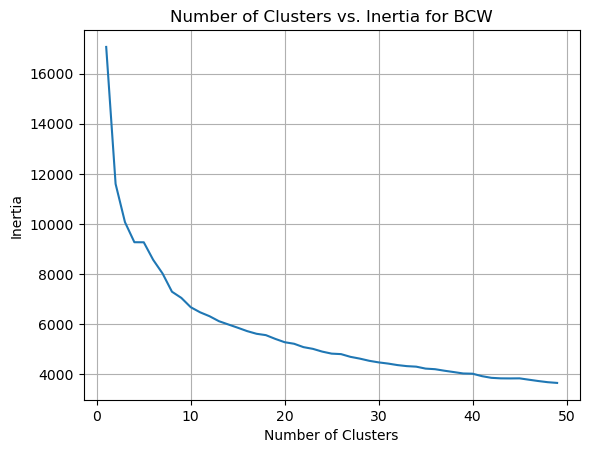

In [6]:
range_n_clusters = np.arange(1,50,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia for BCW')
plt.grid()
plt.savefig('bcw_km_inertia.png')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3425601979538985
For n_clusters = 3 The average silhouette_score is : 0.3151352252818165
For n_clusters = 4 The average silhouette_score is : 0.22657741698923747
For n_clusters = 5 The average silhouette_score is : 0.1601486475736856
For n_clusters = 6 The average silhouette_score is : 0.14324341104491134
For n_clusters = 7 The average silhouette_score is : 0.15409123735072777
For n_clusters = 8 The average silhouette_score is : 0.15037778783109043
For n_clusters = 9 The average silhouette_score is : 0.14283025732703925
For n_clusters = 10 The average silhouette_score is : 0.1441007516040412
For n_clusters = 11 The average silhouette_score is : 0.14250895525633087
For n_clusters = 12 The average silhouette_score is : 0.13898839352274808
For n_clusters = 13 The average silhouette_score is : 0.11568805789163909
For n_clusters = 14 The average silhouette_score is : 0.11701306939432178
For n_clusters = 15 The average silhouette_score i

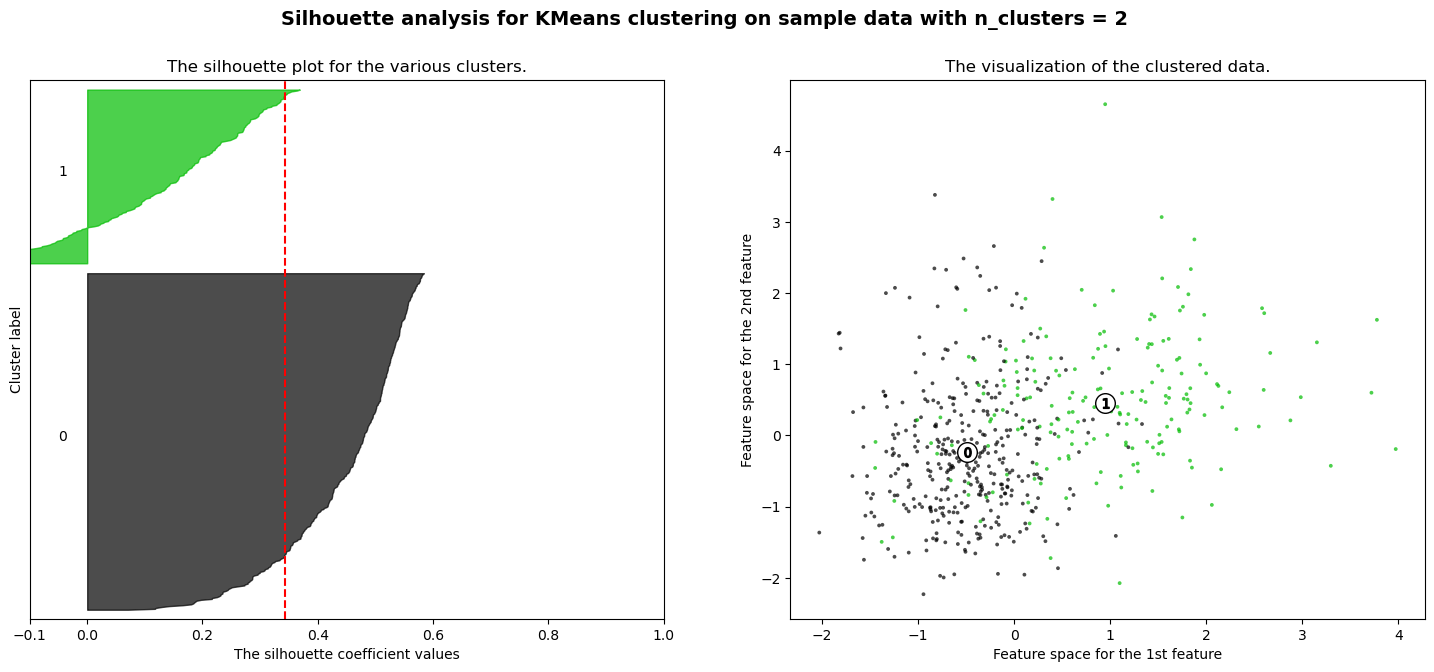

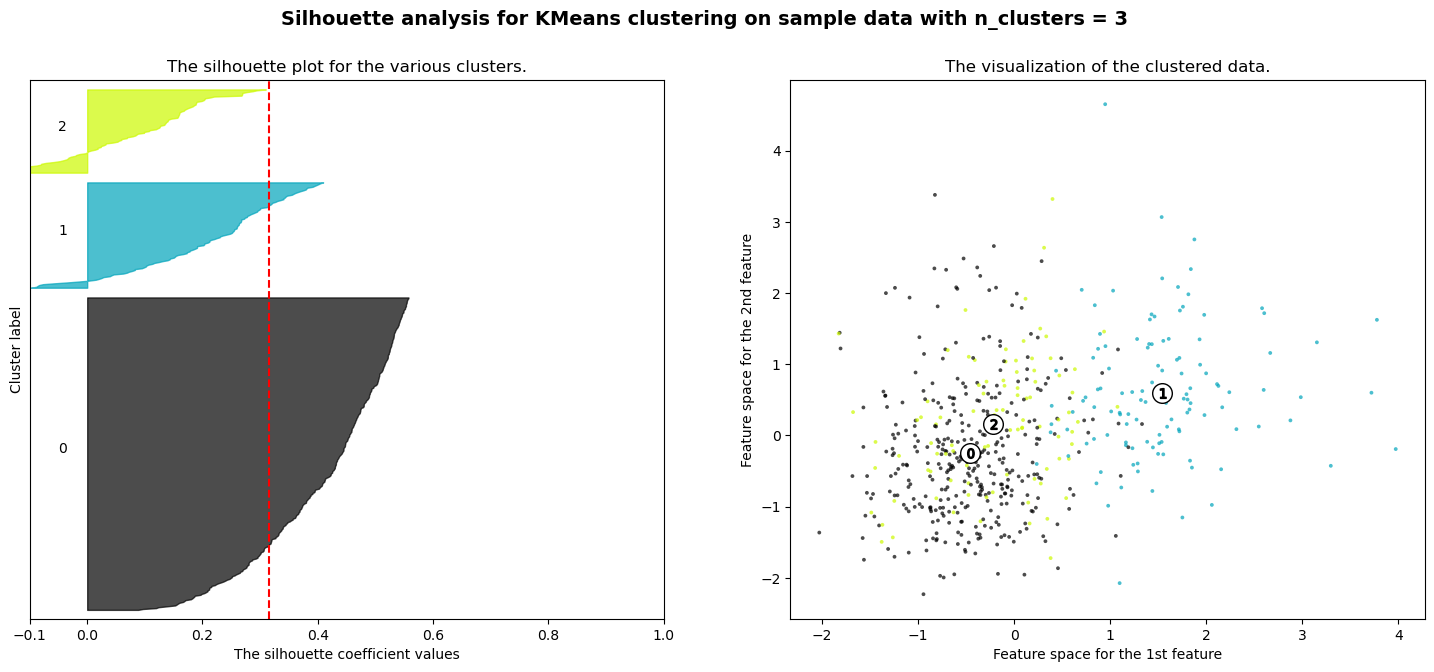

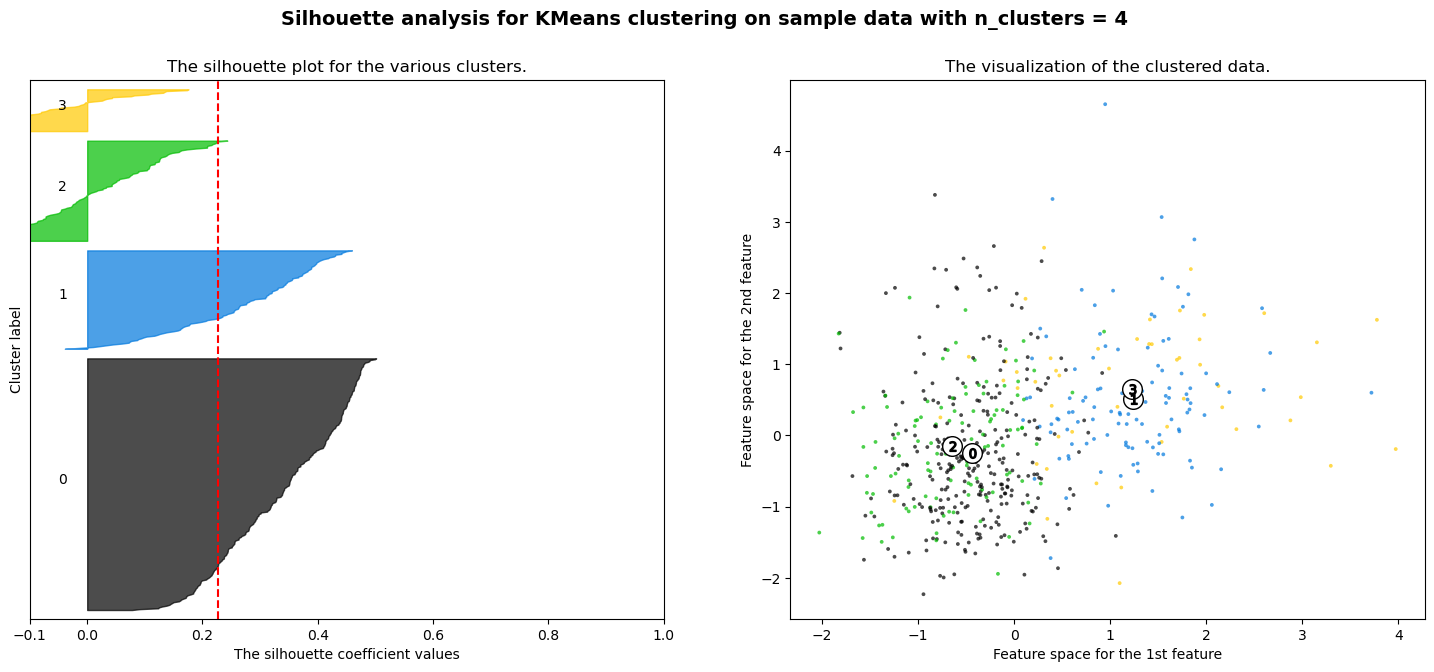

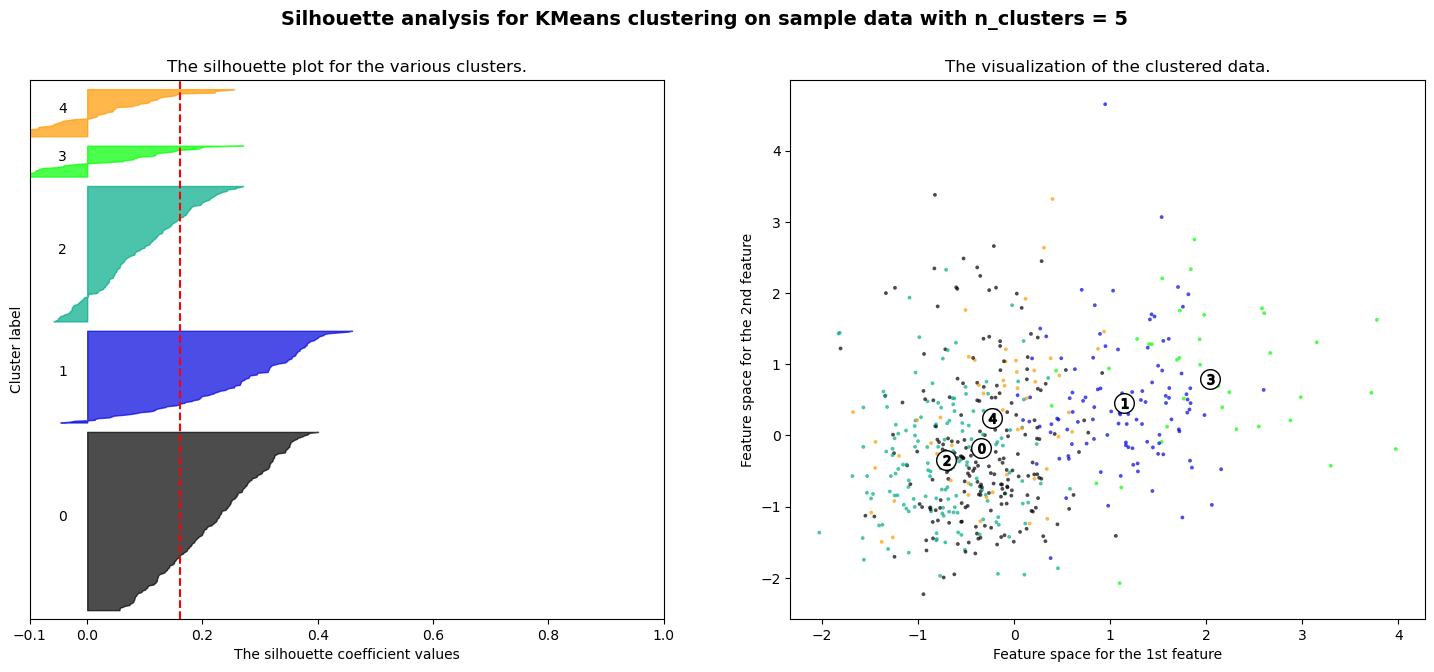

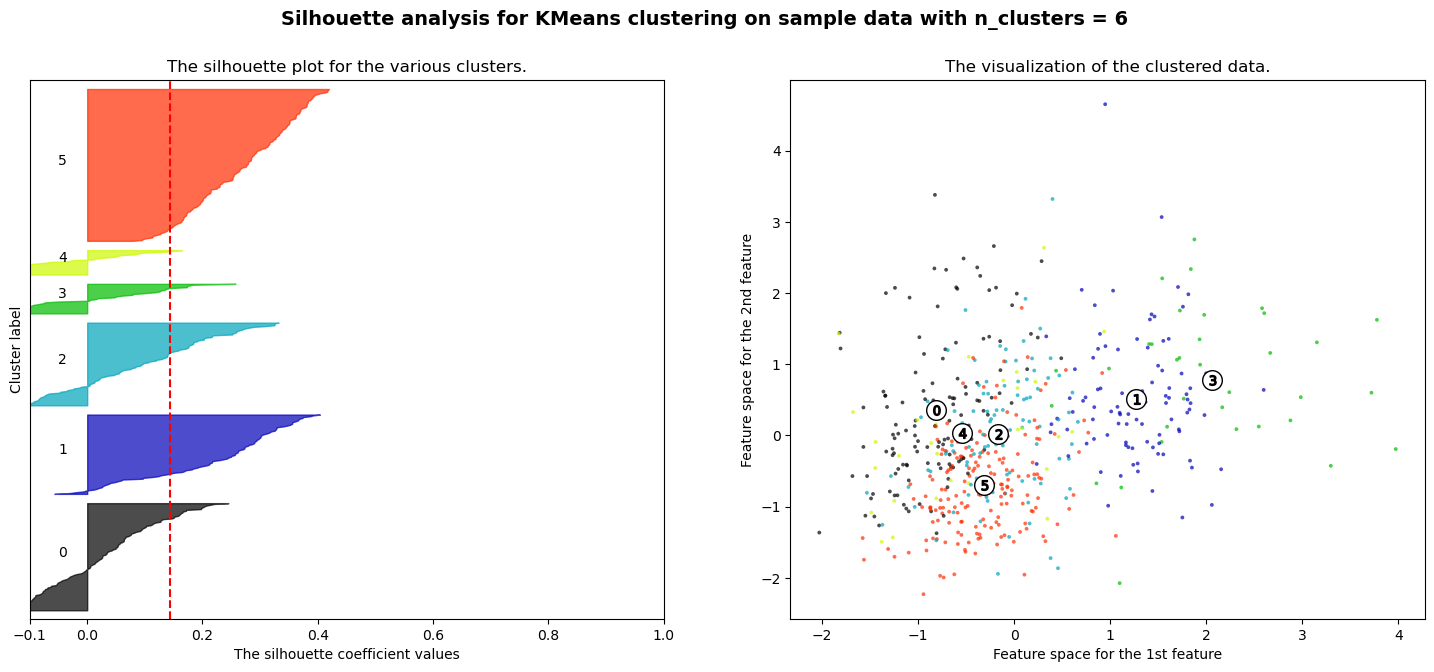

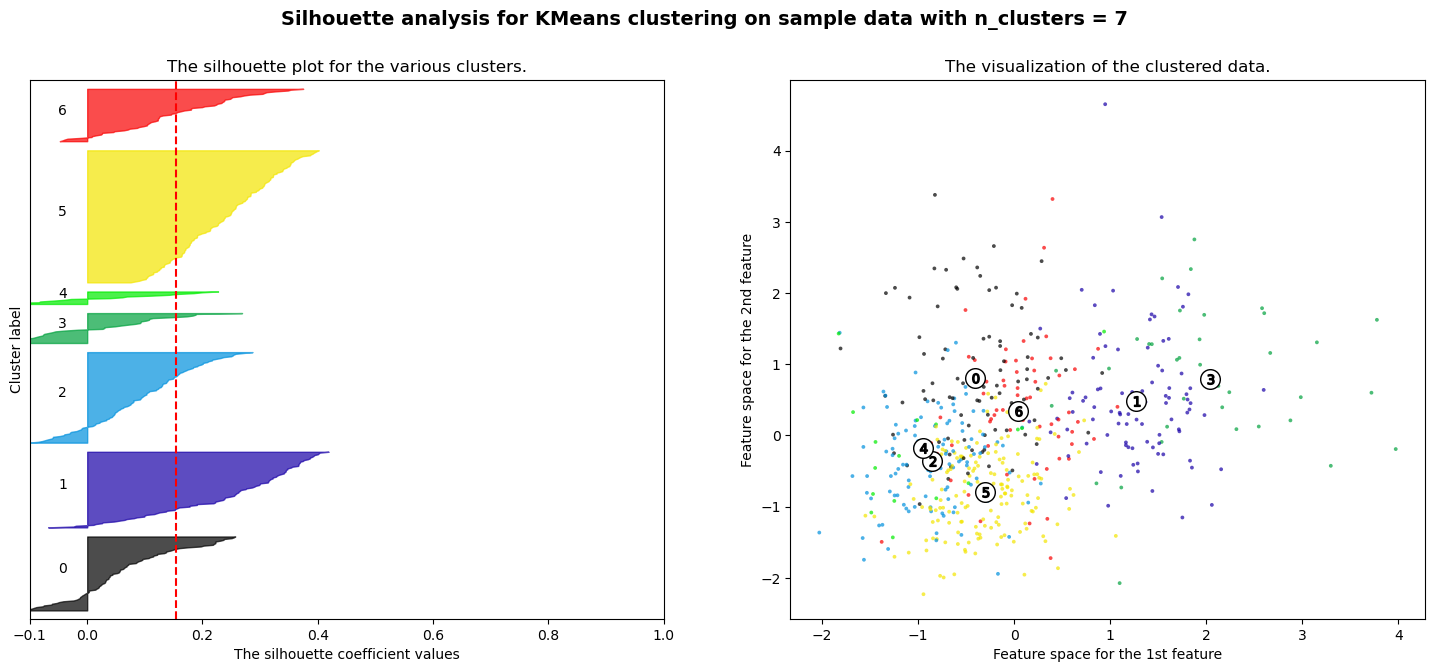

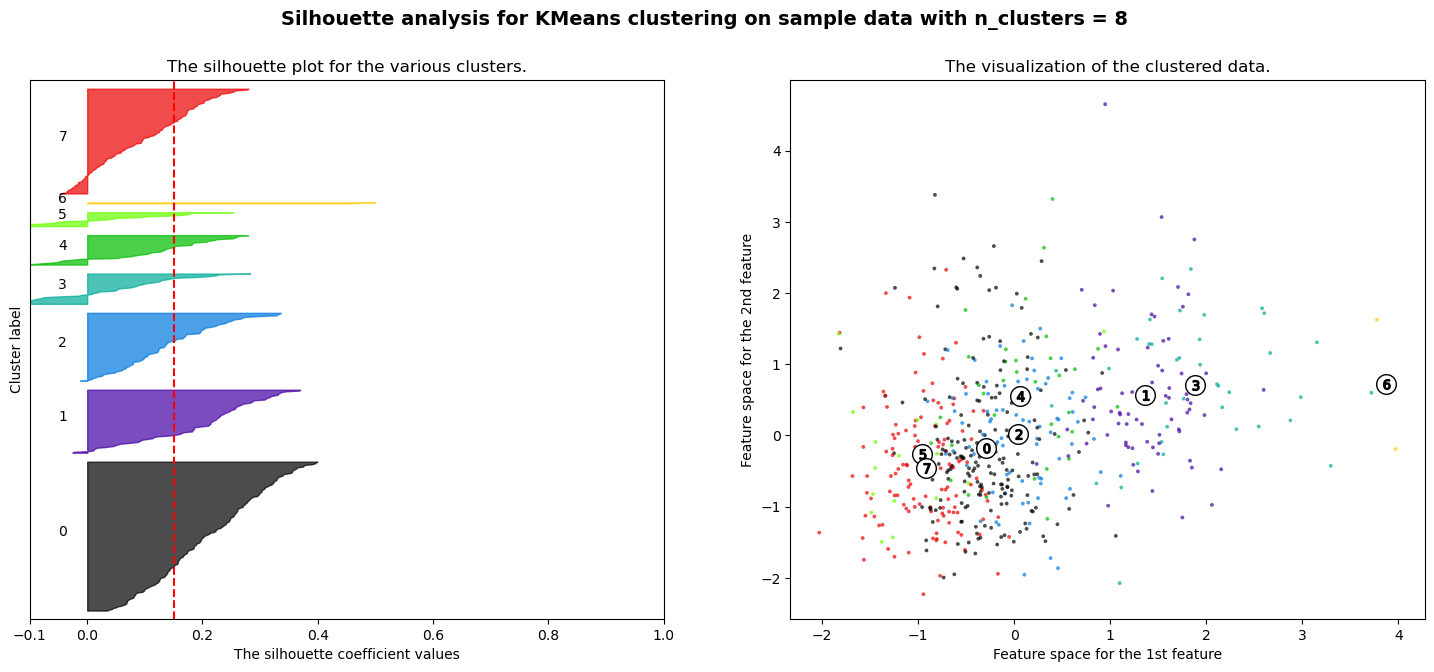

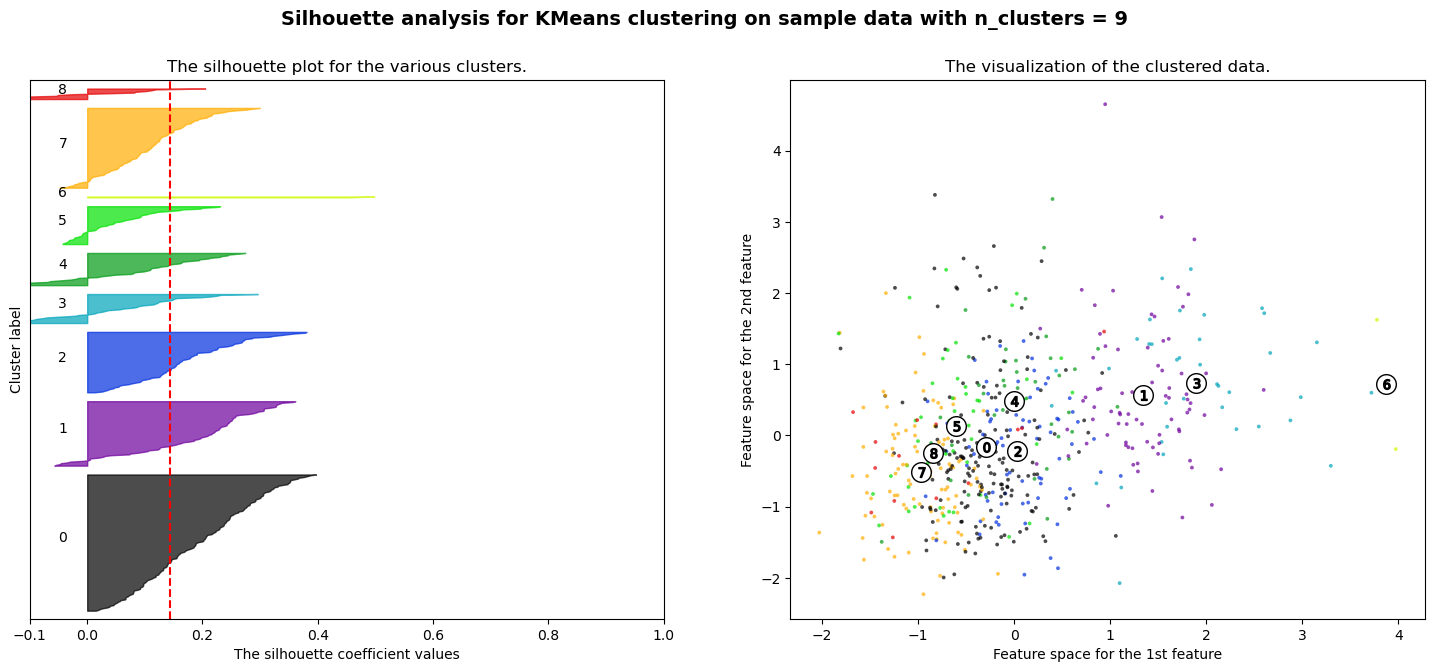

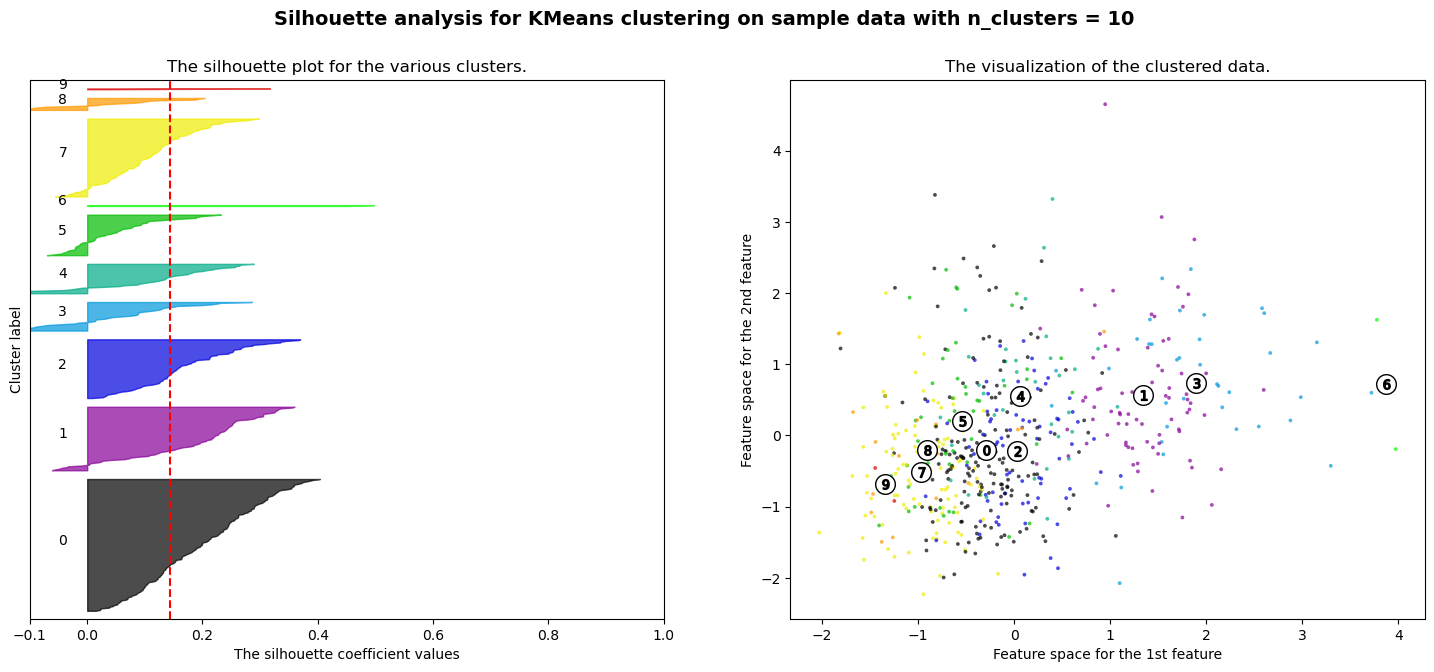

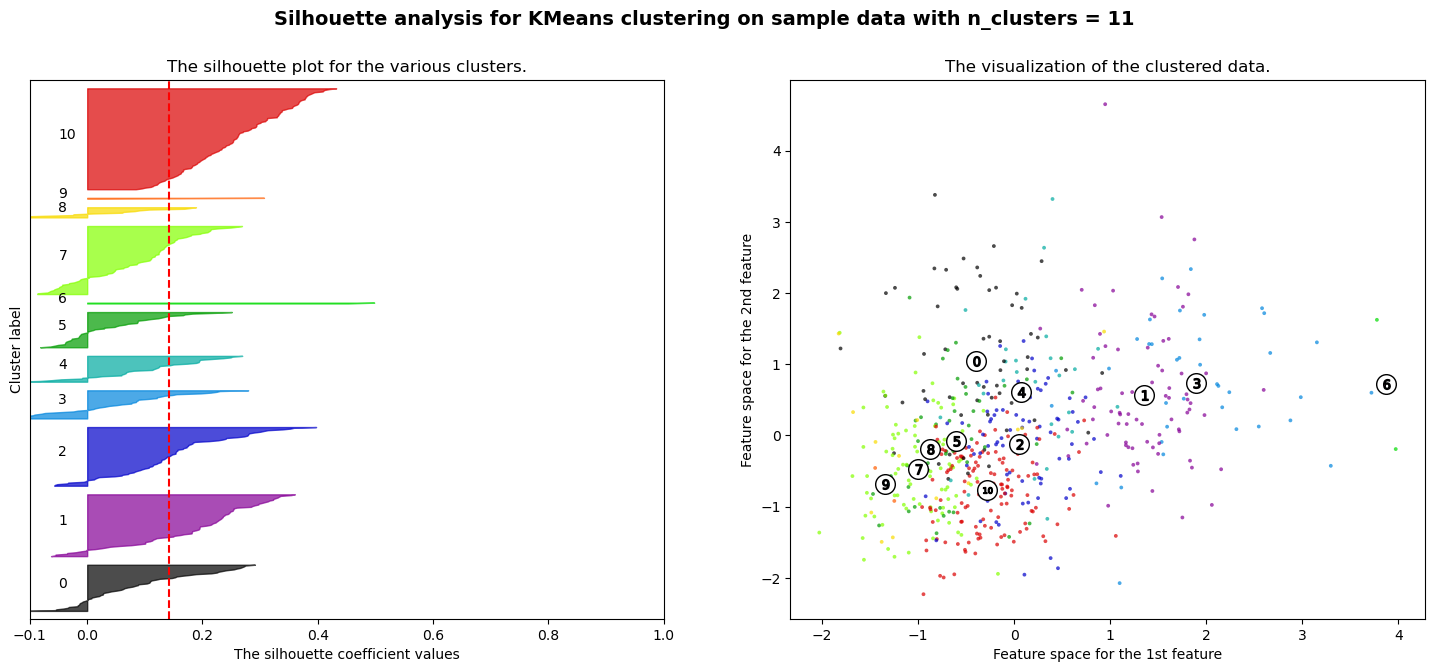

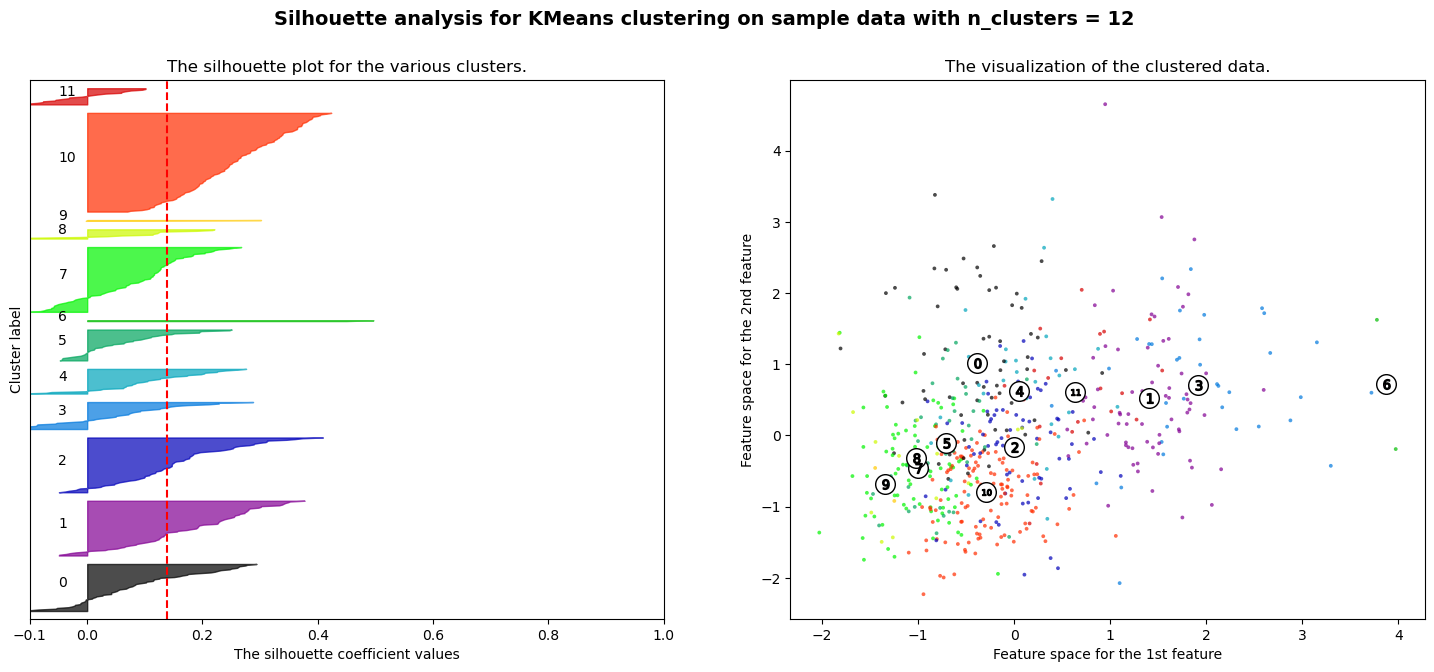

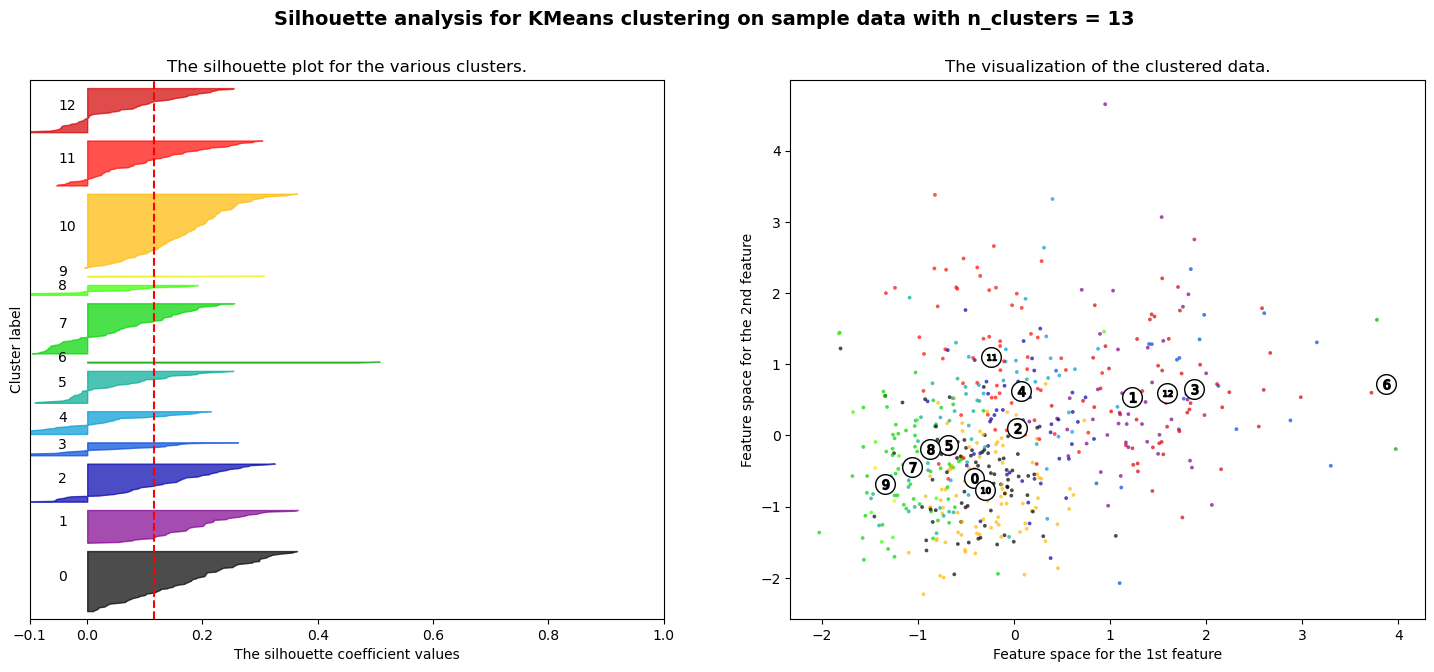

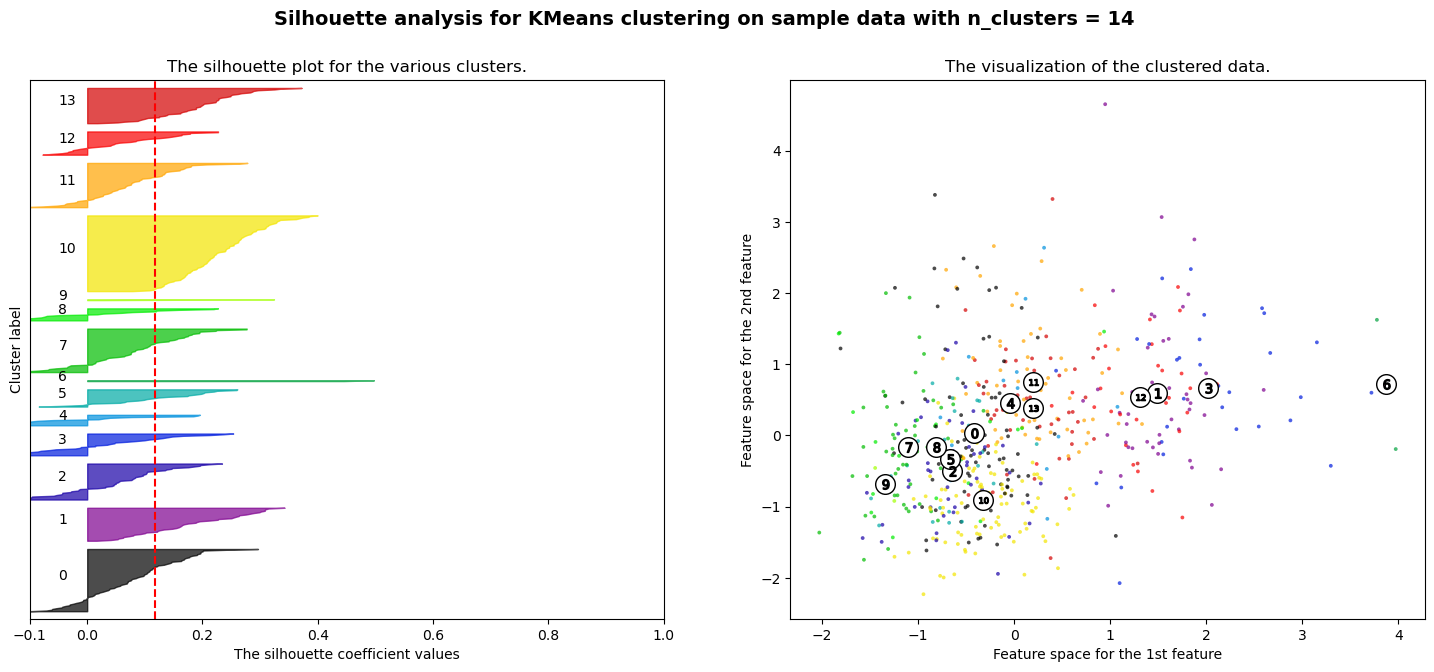

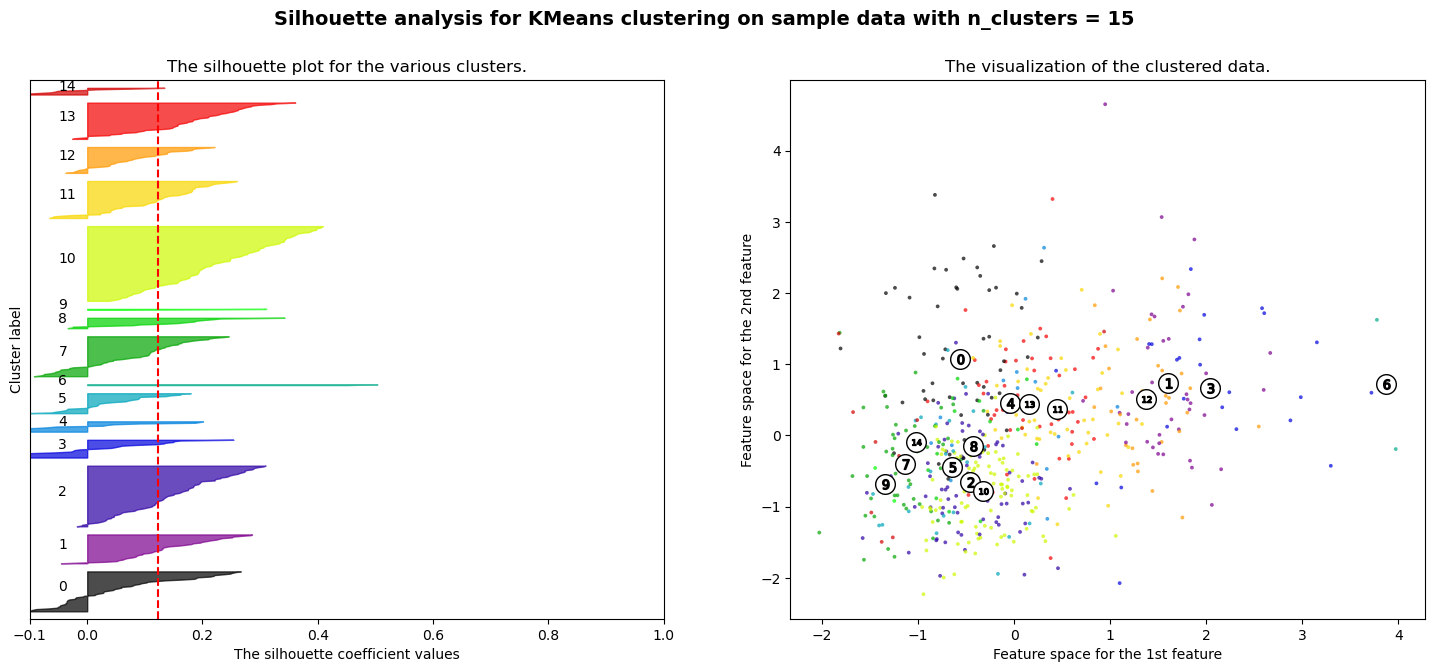

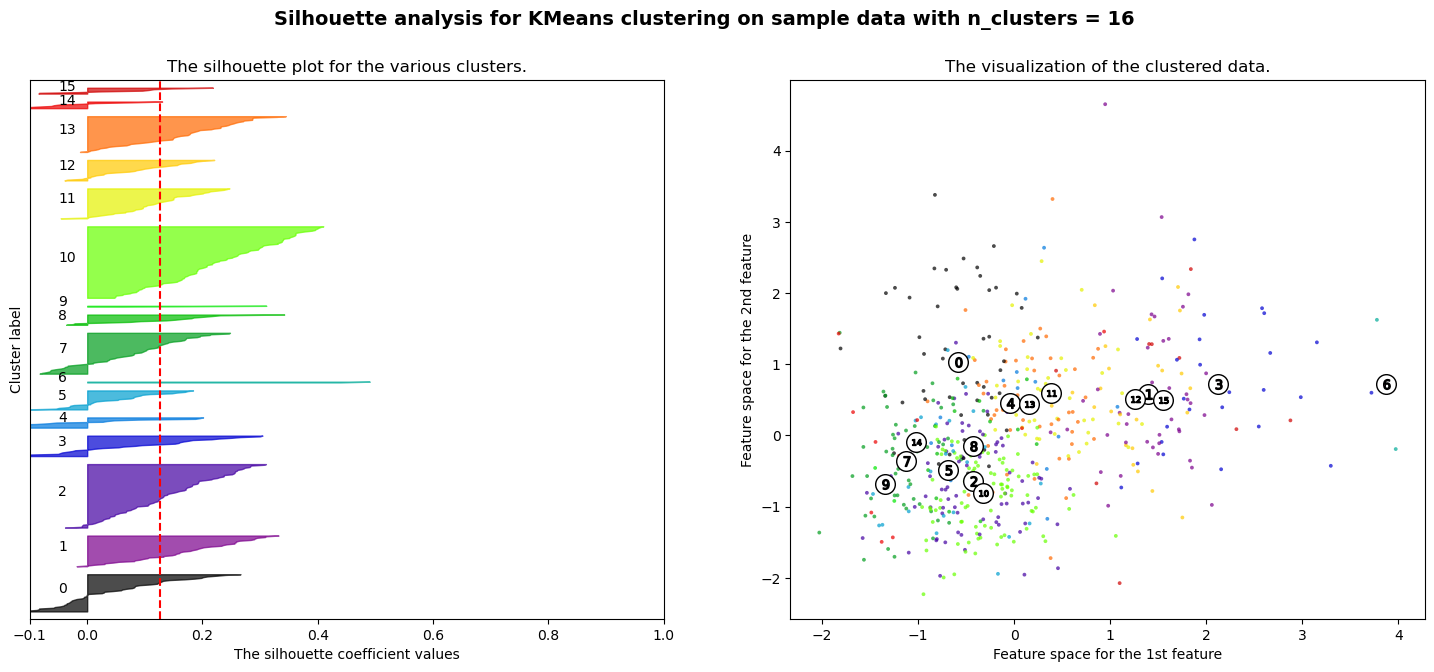

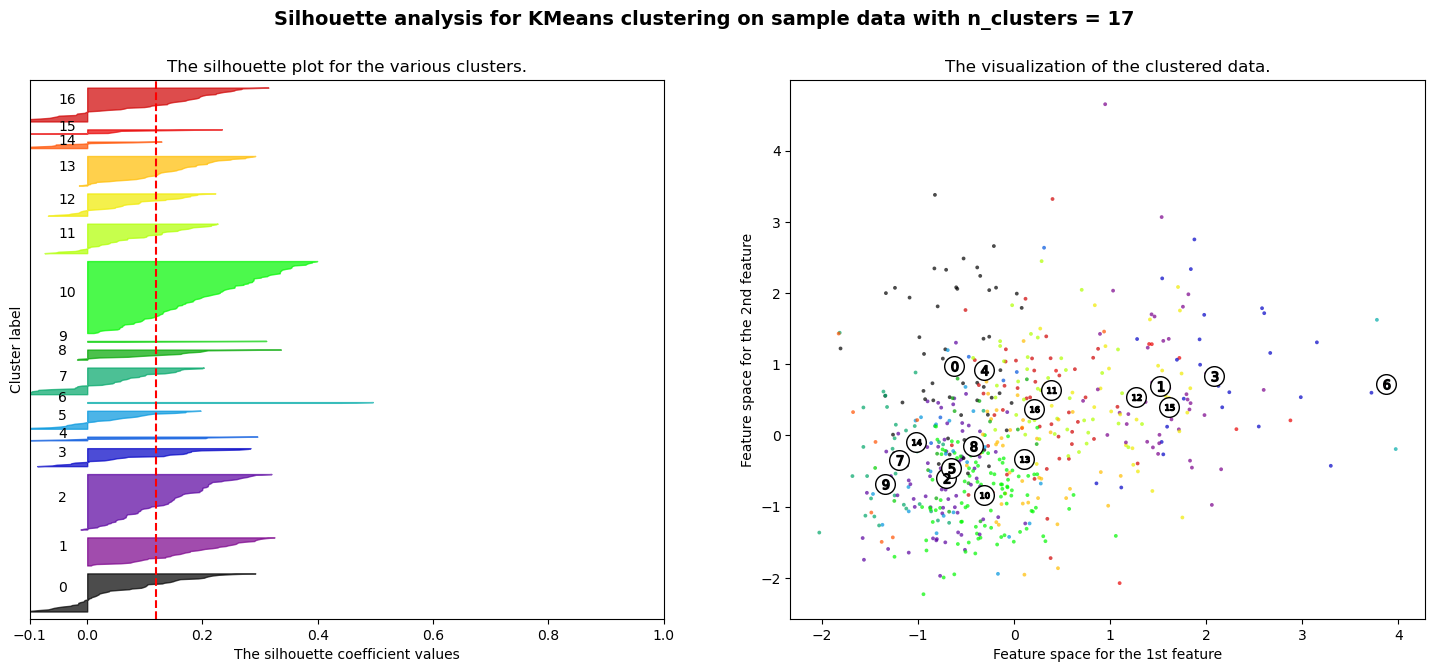

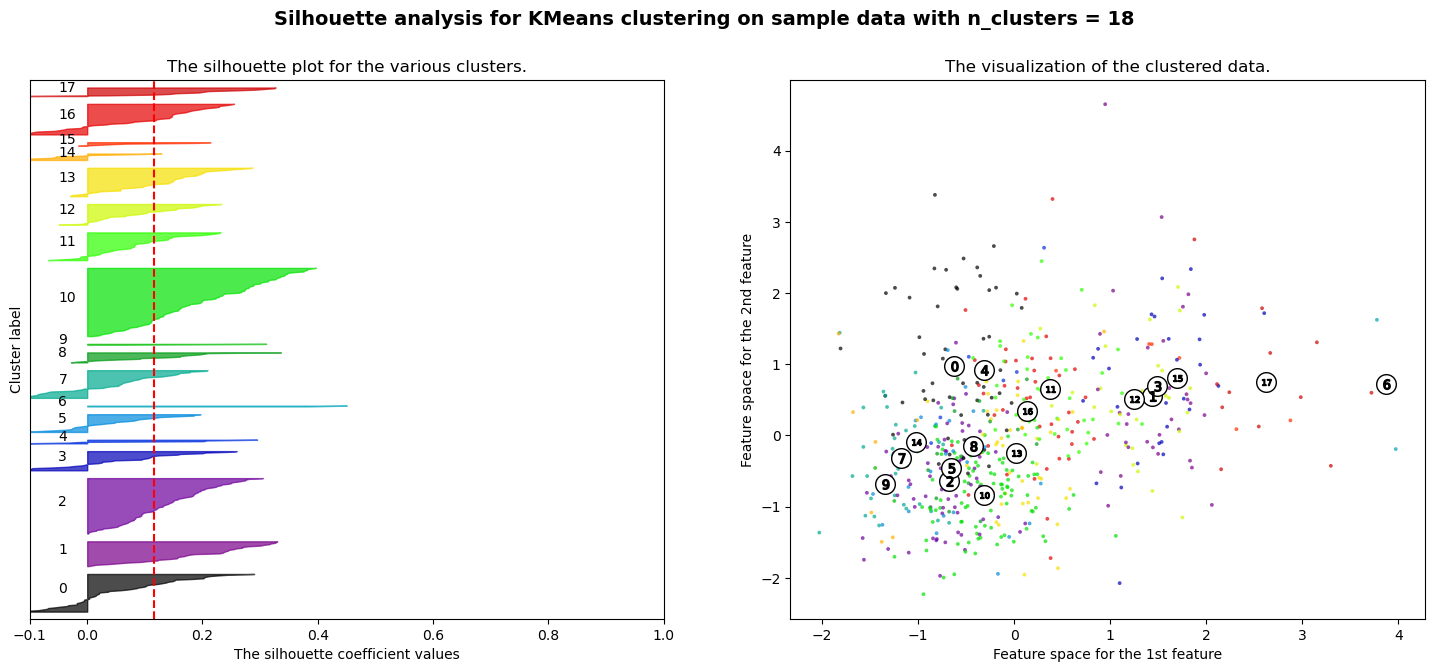

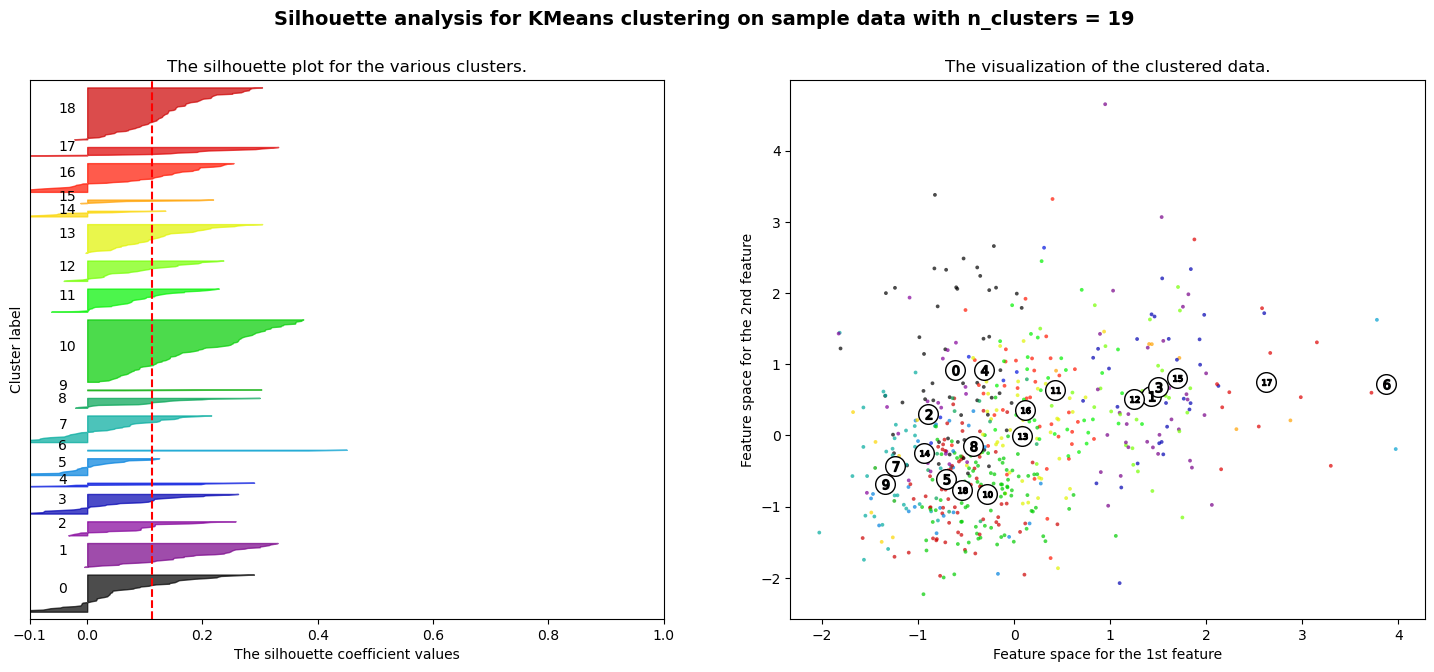

In [7]:
# Code taken from scikit-learn examples (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

range_n_clusters = np.arange(2, 20, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.savefig('bcw_km_silhouette.png')
plt.show()

## EM (GMM)

In [8]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X)
        bic[i][j] = gmm.bic(X)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            best_gmm = gmm

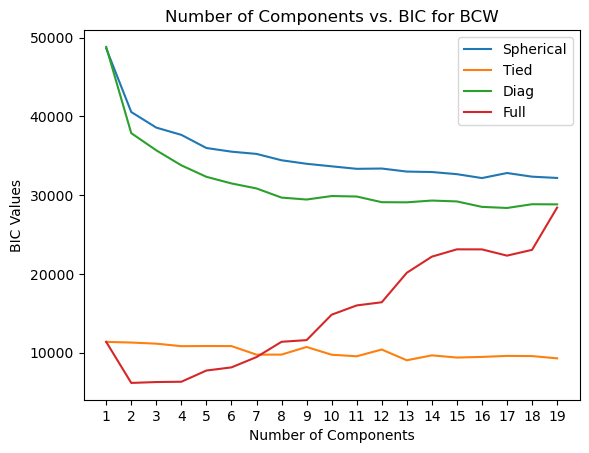

In [9]:
plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for BCW")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('bcw_gmm_bic.png')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31448870991364997
For n_clusters = 3 The average silhouette_score is : 0.2496855269852042
For n_clusters = 4 The average silhouette_score is : 0.23789908291645853
For n_clusters = 5 The average silhouette_score is : 0.12105113873034126
For n_clusters = 6 The average silhouette_score is : 0.12120737057639813
For n_clusters = 7 The average silhouette_score is : 0.1156400650095845


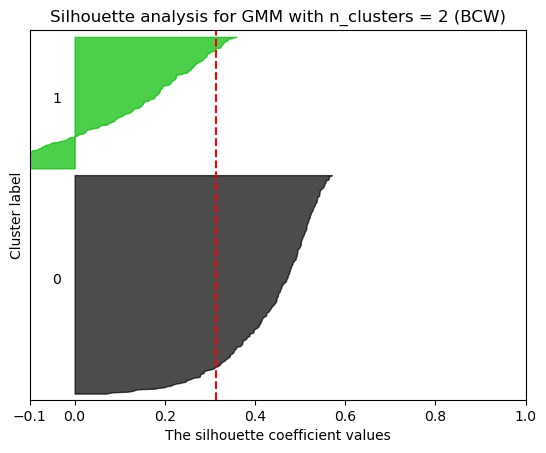

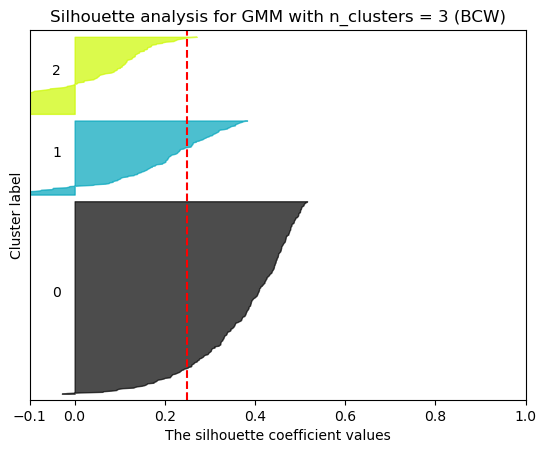

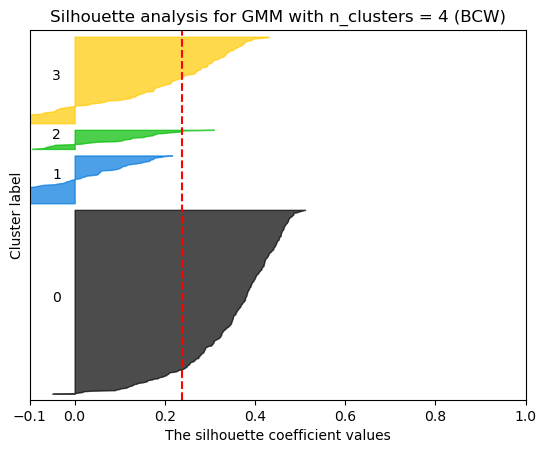

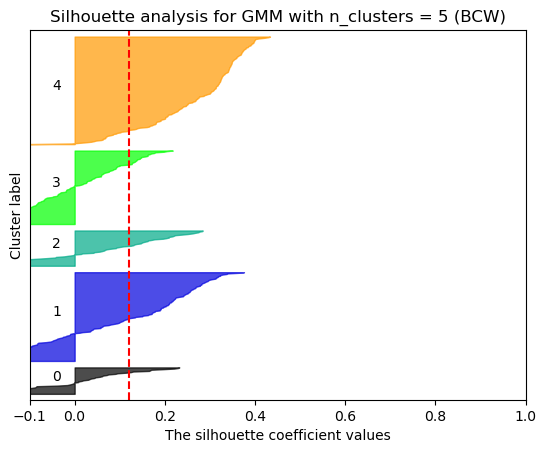

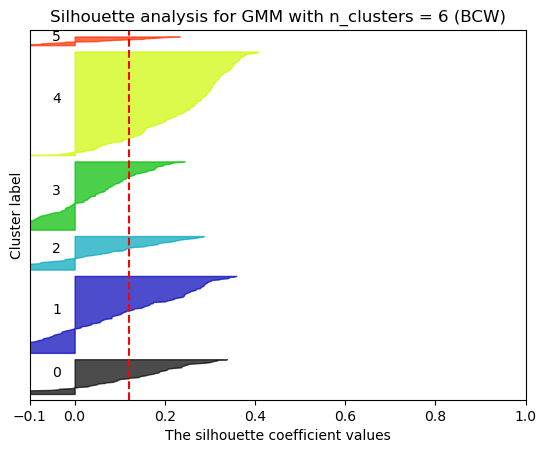

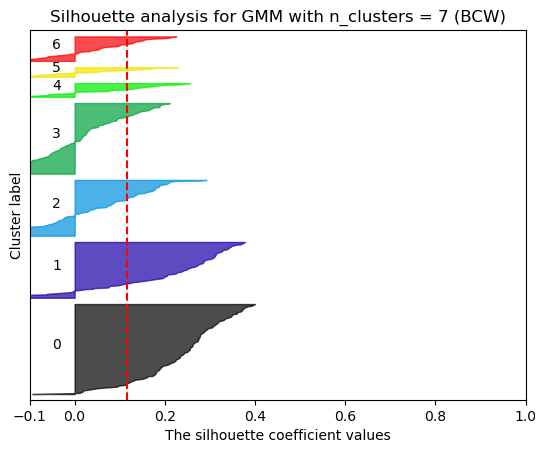

In [10]:
# Code taken from scikit-learn examples (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

range_n_clusters = np.arange(2, 8, 1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
#     fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette analysis for GMM with n_clusters = %d (BCW)" % n_clusters)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('bcw_gmm_silhouette.png')
plt.show()

In [11]:
196/(196+18)

0.9158878504672897

# Dimensionality Reduction

## PCA

In [12]:
pca = PCA()
pca.fit(X)

PCA()

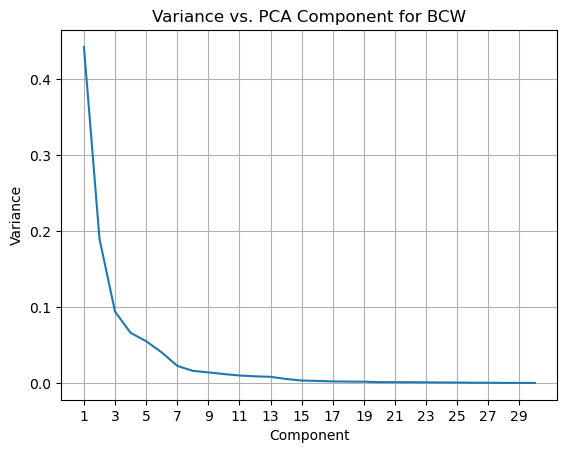

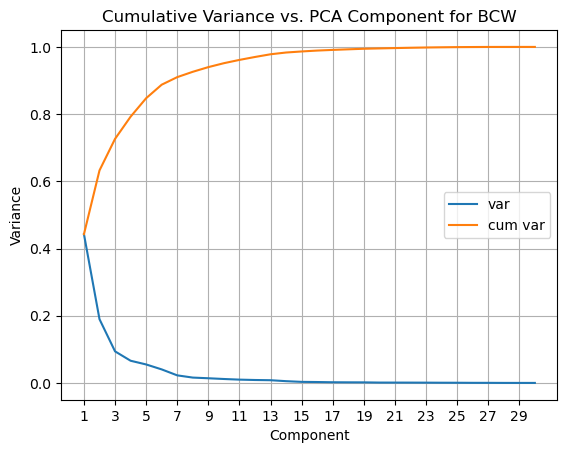

In [13]:
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Variance vs. PCA Component for BCW')
plt.grid()

plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cum var')
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Cumulative Variance vs. PCA Component for BCW')
plt.legend()
plt.grid()
plt.savefig('bcw_pca_variance.png')

In [14]:
X_PCA = PCA(n_components = 6).fit_transform(X)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

## ICA

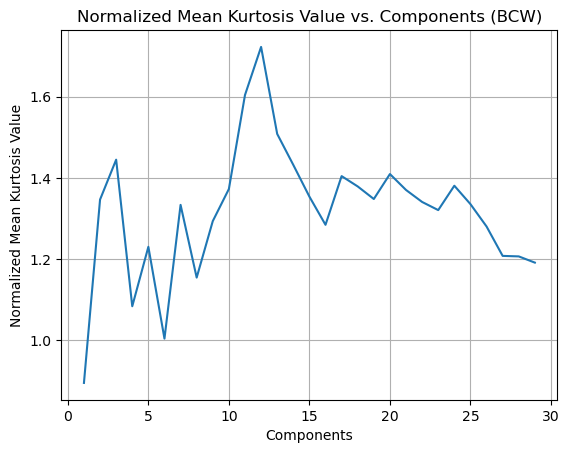

In [15]:
kurtosis_values = []
for i in range(1,30):
    X_ICA = FastICA(n_components = i).fit_transform(X)
    kur = scipy.stats.kurtosis(X_ICA)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.plot(np.arange(1,30),kurtosis_values)
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.grid()
plt.title('Normalized Mean Kurtosis Value vs. Components (BCW)')
plt.savefig('bcw_ica_kurtosis.png')
plt.show()

In [17]:
X_ICA = FastICA(n_components = np.argmax(kurtosis_values)+1).fit_transform(X)
X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, y, test_size=0.3, random_state=42)

## RP

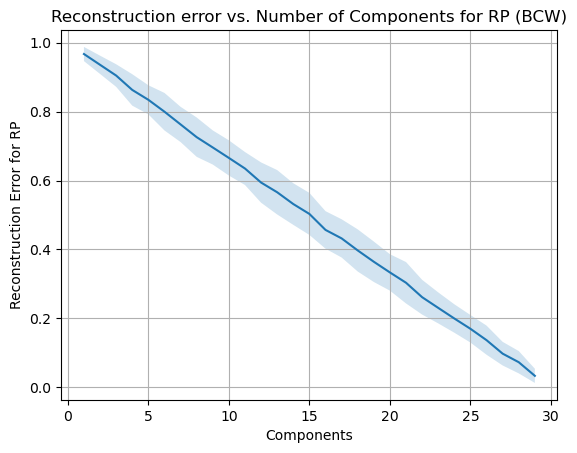

In [18]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,30):
    mean_mse = []
    for j in range(0,100):
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X)
        w = X_RP.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X.T)).T
        mean_mse.append(mean_squared_error(X,reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
plt.plot(np.arange(1,30),reconstruction_error)
plt.fill_between(np.arange(1,30),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error for RP')
plt.title('Reconstruction error vs. Number of Components for RP (BCW)')
plt.grid()
plt.savefig('bcw_rp_error.png')
plt.show()

In [20]:
X_RP = GaussianRandomProjection(n_components = 6).fit_transform(X)
X_RP_train, X_RP_test, y_RP_train, y_RP_test = train_test_split(X_RP, y, test_size=0.3, random_state=42)

# Clustering with Dimensionality Reduction

## K-Means

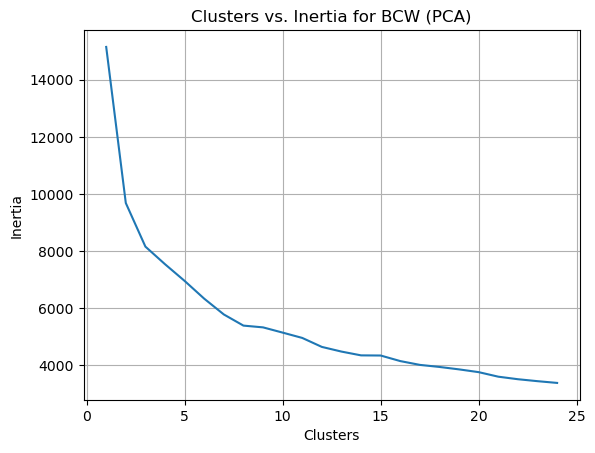

In [21]:
range_n_clusters = np.arange(1,25,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_PCA)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia for BCW (PCA)')
plt.grid()
plt.savefig('bcw_inertia_pca.png')
plt.show()

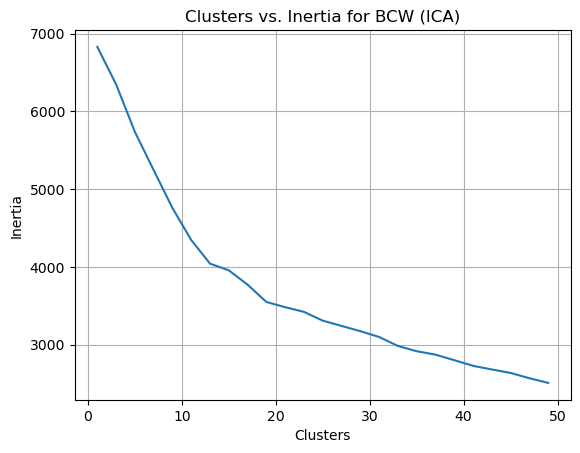

In [22]:
range_n_clusters = np.arange(1,50,2)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_ICA)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia for BCW (ICA)')
plt.grid()
plt.savefig('bc_inertia_ica.png')
plt.show()

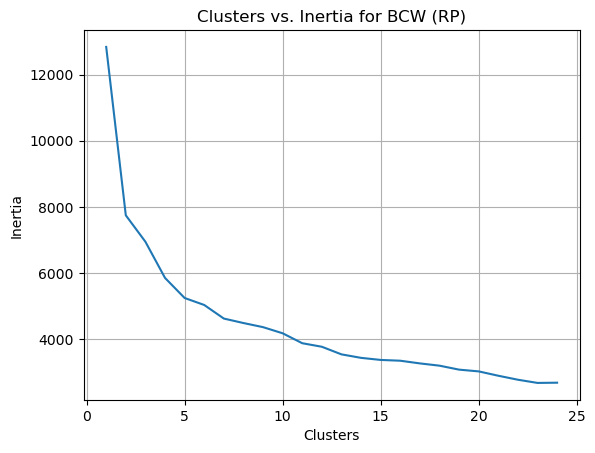

In [23]:
range_n_clusters = np.arange(1,25,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X_RP)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.plot(range_n_clusters,inertia)
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Clusters vs. Inertia for BCW (RP)')
plt.grid()
plt.savefig('bc_inertia_rp.png')
plt.show()

## EM (GMM)

In [24]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_PCA)
        bic[i][j] = gmm.bic(X_PCA)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            best_gmm = gmm

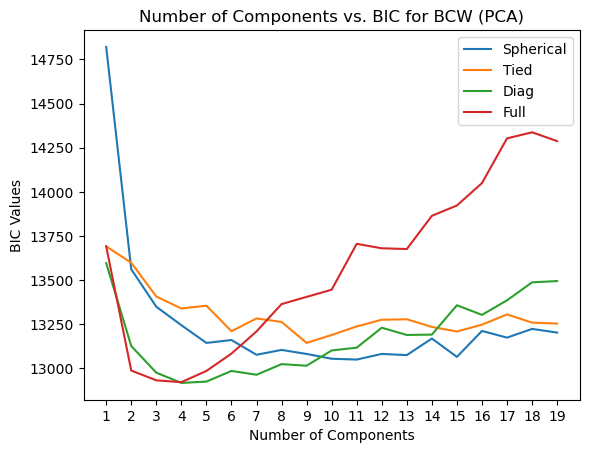

In [25]:
plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for BCW (PCA)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('bcw_bic_pca.png')
plt.show()

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 6
Lowest BIC currently for spherical 16
Lowest BIC currently for diag 3
Lowest BIC currently for diag 4


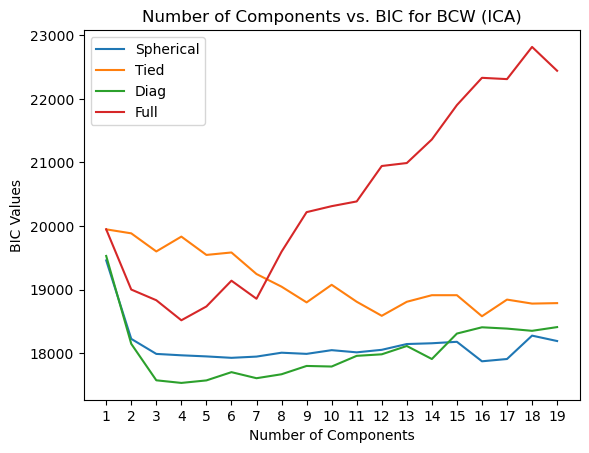

In [26]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_ICA)
        bic[i][j] = gmm.bic(X_ICA)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm

plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for BCW (ICA)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('bcw_bic_ica.png')
plt.show()

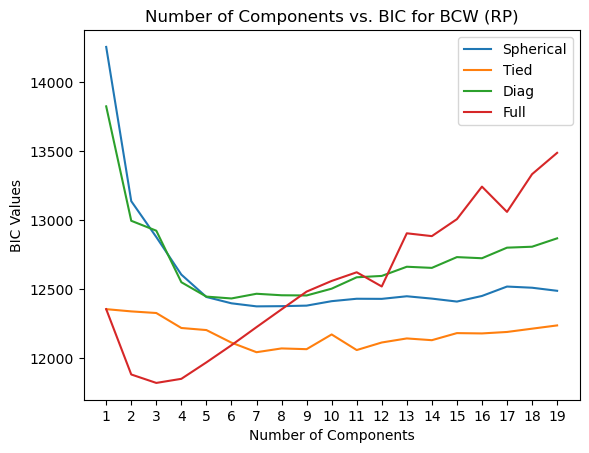

In [27]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X_RP)
        bic[i][j] = gmm.bic(X_RP)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            best_gmm = gmm

plt.figure()
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.xticks(num_components_values)
plt.title("Number of Components vs. BIC for BCW (RP)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.savefig('bcw_bic_rp.png')
plt.show()

# Neural Network with Dimensionality Reduction

## Nominal Performance

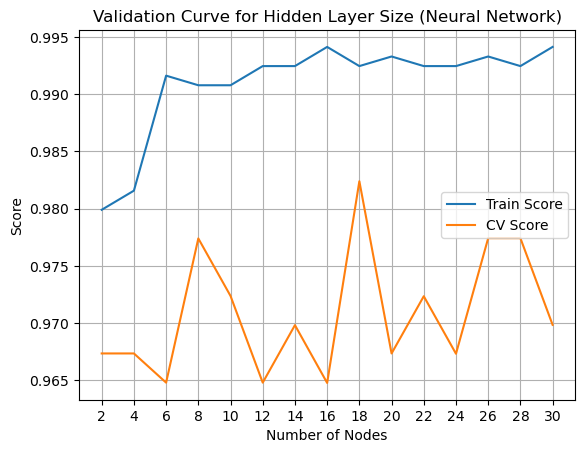

In [28]:
classifier_neural_network = MLPClassifier(random_state=42, max_iter=2000)
train_scores, test_scores = validation_curve(classifier_neural_network, X_train, y_train, param_name="hidden_layer_sizes", param_range=np.arange(2,31,2), cv=4)

plt.figure()
plt.plot(np.arange(2,31,2), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(2,31,2), np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Validation Curve for Hidden Layer Size (Neural Network)")
plt.xlabel("Number of Nodes")
plt.ylabel("Score")
plt.grid()
plt.xticks(np.arange(2,31,2))
plt.savefig('bcw_nn_validation_curve.png')
plt.show()

In [29]:
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,25,2)}
classifier_neural_network_best = GridSearchCV(classifier_neural_network, param_grid=param_grid, cv=4)

start_time = time.time()
classifier_neural_network_best.fit(X_train, y_train)
end_time = time.time()
time_train = end_time-start_time
print("Best params for neural network:",classifier_neural_network_best.best_params_)
print("Time to train:",time_train)

start_time = time.time()
classifier_accuracy = accuracy_score(y_test, classifier_neural_network_best.predict(X_test))
end_time = time.time()
time_infer = end_time-start_time
print("Accuracy for best neural network:", classifier_accuracy)
print("Time to infer:",time_infer)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 18}
Time to train: 33.715797424316406
Accuracy for best neural network: 0.9824561403508771
Time to infer: 0.0006022453308105469


In [30]:
confusion_matrix(y_test, classifier_neural_network_best.predict(X_test))

array([[ 62,   1],
       [  2, 106]])

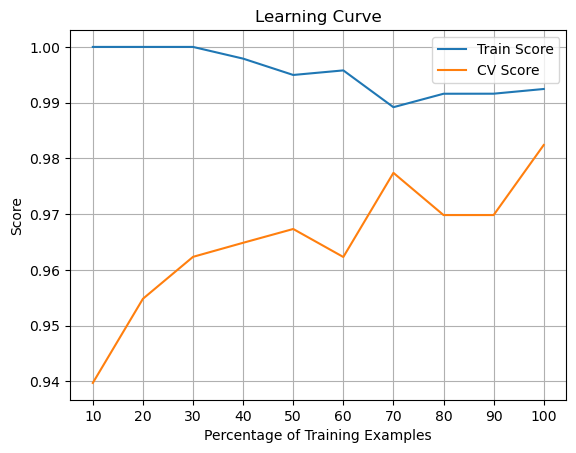

In [31]:
classifier_neural_network_learning = MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=classifier_neural_network_best.best_params_['hidden_layer_sizes'], alpha=classifier_neural_network_best.best_params_['alpha'])
_, train_scores, test_scores = learning_curve(classifier_neural_network_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('bcw_nn_learning_curve.png')
plt.show()

## PCA

In [32]:
classifier_neural_network = MLPClassifier(random_state=42, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,25,2)}
classifier_neural_network_best = GridSearchCV(classifier_neural_network, param_grid=param_grid, cv=4)

start_time = time.time()
classifier_neural_network_best.fit(X_PCA_train, y_PCA_train)
end_time = time.time()
time_train = end_time-start_time
print("Best params for neural network:",classifier_neural_network_best.best_params_)
print("Time to train:",time_train)

start_time = time.time()
classifier_accuracy = accuracy_score(y_PCA_test, classifier_neural_network_best.predict(X_PCA_test))
end_time = time.time()
time_infer = end_time-start_time
print("Accuracy for best neural network:", classifier_accuracy)
print("Time to infer:",time_infer)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 4}
Time to train: 34.85652041435242
Accuracy for best neural network: 0.9941520467836257
Time to infer: 0.0004127025604248047


In [33]:
confusion_matrix(y_PCA_test, classifier_neural_network_best.predict(X_PCA_test))

array([[ 62,   1],
       [  0, 108]])

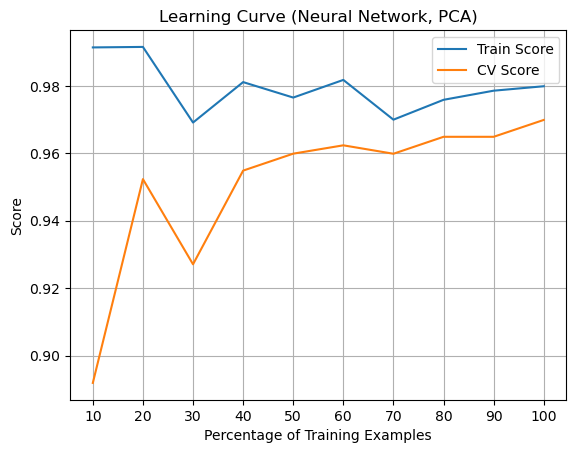

In [34]:
classifier_neural_network_learning = MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=classifier_neural_network_best.best_params_['hidden_layer_sizes'], alpha=classifier_neural_network_best.best_params_['alpha'])
_, train_scores, test_scores = learning_curve(classifier_neural_network_learning, X_PCA_train, y_PCA_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Learning Curve (Neural Network, PCA)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('bcw_nn_learning_curve_pca.png')
plt.show()

## ICA

In [35]:
classifier_neural_network = MLPClassifier(random_state=42, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,25,2)}
classifier_neural_network_best = GridSearchCV(classifier_neural_network, param_grid=param_grid, cv=4)

start_time = time.time()
classifier_neural_network_best.fit(X_ICA_train, y_ICA_train)
end_time = time.time()
time_train = end_time-start_time
print("Best params for neural network:",classifier_neural_network_best.best_params_)
print("Time to train:",time_train)

start_time = time.time()
classifier_accuracy = accuracy_score(y_ICA_test, classifier_neural_network_best.predict(X_ICA_test))
end_time = time.time()
time_infer = end_time-start_time
print("Accuracy for best neural network:", classifier_accuracy)
print("Time to infer:",time_infer)

Best params for neural network: {'alpha': 1.0, 'hidden_layer_sizes': 20}
Time to train: 33.990649700164795
Accuracy for best neural network: 0.9824561403508771
Time to infer: 0.0005118846893310547


In [36]:
confusion_matrix(y_ICA_test, classifier_neural_network_best.predict(X_ICA_test))

array([[ 62,   1],
       [  2, 106]])

In [37]:
X_ICA_train.shape

(398, 12)

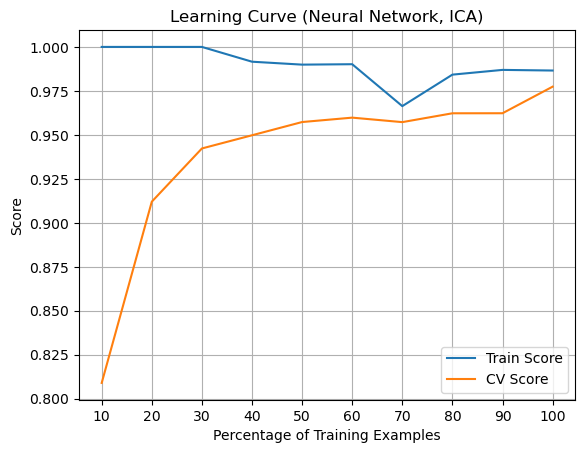

In [38]:
classifier_neural_network_learning = MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=classifier_neural_network_best.best_params_['hidden_layer_sizes'], alpha=classifier_neural_network_best.best_params_['alpha'])
_, train_scores, test_scores = learning_curve(classifier_neural_network_learning, X_ICA_train, y_ICA_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Learning Curve (Neural Network, ICA)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('bcw_nn_learning_curve_ica.png')
plt.show()

## RP

In [39]:
classifier_neural_network = MLPClassifier(random_state=42, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,25,2)}
classifier_neural_network_best = GridSearchCV(classifier_neural_network, param_grid=param_grid, cv=4)

start_time = time.time()
classifier_neural_network_best.fit(X_RP_train, y_RP_train)
end_time = time.time()
time_train = end_time-start_time
print("Best params for neural network:",classifier_neural_network_best.best_params_)
print("Time to train:",time_train)

start_time = time.time()
classifier_accuracy = accuracy_score(y_RP_test, classifier_neural_network_best.predict(X_RP_test))
end_time = time.time()
time_infer = end_time-start_time
print("Accuracy for best neural network:", classifier_accuracy)
print("Time to infer:",time_infer)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 24}
Time to train: 36.77261567115784
Accuracy for best neural network: 0.9590643274853801
Time to infer: 0.0005412101745605469


In [40]:
accuracy_score(y_RP_train, classifier_neural_network_best.predict(X_RP_train))

0.949748743718593

In [41]:
confusion_matrix(y_RP_test, classifier_neural_network_best.predict(X_RP_test))

array([[ 61,   2],
       [  5, 103]])

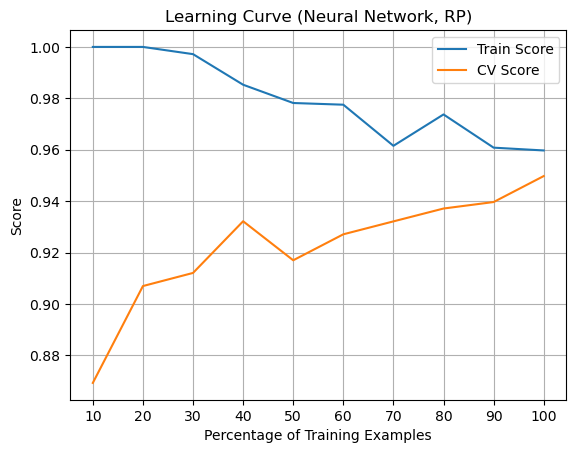

In [42]:
classifier_neural_network_learning = MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=classifier_neural_network_best.best_params_['hidden_layer_sizes'], alpha=classifier_neural_network_best.best_params_['alpha'])
_, train_scores, test_scores = learning_curve(classifier_neural_network_learning, X_RP_train, y_RP_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Learning Curve (Neural Network, RP)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('bcw_nn_learning_curve_rp.png')
plt.show()

# Neural Network with Clustering

## PCA

In [43]:
k = 6
k_means_clustering = KMeans(n_clusters=k, random_state=42)
k_means_clustering.fit_transform(X)

array([[15.47786284, 13.43606436, 12.50481213,  7.86526754,  7.39188516,
         9.82261813],
       [12.89468258,  6.37335533,  7.61627683,  9.31936492,  4.41941765,
         4.79724492],
       [12.15722985,  8.77589066,  8.62529037,  6.61389511,  2.23124448,
         5.05724562],
       ...,
       [11.12526631,  5.11342423,  6.07996162,  8.00556847,  5.51097838,
         3.7570572 ],
       [14.64478997, 13.94169416, 13.20176198,  7.6977962 ,  7.22739097,
         9.82748385],
       [14.99356886,  4.8764648 ,  5.88683608, 11.91273715, 11.92915229,
         8.16078096]])

In [44]:
X_KMeans = np.append(X, k_means_clustering.fit_transform(X), 1)
X_KMeans_train, X_KMeans_test, y_KMeans_train, y_KMeans_test = train_test_split(X_KMeans, y, test_size=0.3, random_state=42)

In [45]:
classifier_neural_network = MLPClassifier(random_state=42, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,25,2)}
classifier_neural_network_best = GridSearchCV(classifier_neural_network, param_grid=param_grid, cv=4)

start_time = time.time()
classifier_neural_network_best.fit(X_KMeans_train, y_KMeans_train)
end_time = time.time()
time_train = end_time-start_time
print("Best params for neural network:",classifier_neural_network_best.best_params_)
print("Time to train:",time_train)

start_time = time.time()
classifier_accuracy = accuracy_score(y_KMeans_test, classifier_neural_network_best.predict(X_KMeans_test))
end_time = time.time()
time_infer = end_time-start_time
print("Accuracy for best neural network:", classifier_accuracy)
print("Time to infer:",time_infer)

Best params for neural network: {'alpha': 0.001, 'hidden_layer_sizes': 4}
Time to train: 41.03866529464722
Accuracy for best neural network: 0.9883040935672515
Time to infer: 0.00040650367736816406


In [46]:
confusion_matrix(y_KMeans_test, classifier_neural_network_best.predict(X_KMeans_test))

array([[ 62,   1],
       [  1, 107]])

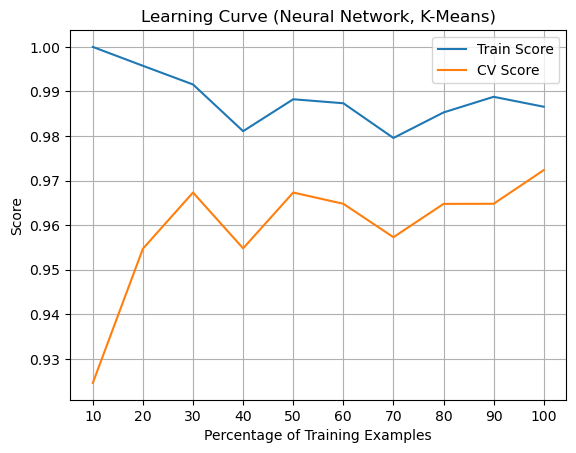

In [47]:
classifier_neural_network_learning = MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=classifier_neural_network_best.best_params_['hidden_layer_sizes'], alpha=classifier_neural_network_best.best_params_['alpha'])
_, train_scores, test_scores = learning_curve(classifier_neural_network_learning, X_KMeans_train, y_KMeans_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Learning Curve (Neural Network, K-Means)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('bcw_nn_learning_curve_kmeans.png')
plt.show()

## EM (GMM)

In [48]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
gmm.predict_proba(X)

array([[0.00000000e+000, 1.00000000e+000],
       [1.27738029e-202, 1.00000000e+000],
       [1.47519790e-133, 1.00000000e+000],
       ...,
       [1.87555583e-004, 9.99812444e-001],
       [3.89426119e-172, 1.00000000e+000],
       [1.00000000e+000, 3.29217629e-037]])

In [49]:
X_GMM = np.append(X, gmm.predict_proba(X), 1)
X_GMM_train, X_GMM_test, y_GMM_train, y_GMM_test = train_test_split(X_GMM, y, test_size=0.3, random_state=42)

In [50]:
classifier_neural_network = MLPClassifier(random_state=42, max_iter=2000)
param_grid = {'alpha': np.logspace(-3,3,7), 'hidden_layer_sizes': np.arange(2,25,2)}
classifier_neural_network_best = GridSearchCV(classifier_neural_network, param_grid=param_grid, cv=4)

start_time = time.time()
classifier_neural_network_best.fit(X_GMM_train, y_GMM_train)
end_time = time.time()
time_train = end_time-start_time
print("Best params for neural network:",classifier_neural_network_best.best_params_)
print("Time to train:",time_train)

start_time = time.time()
classifier_accuracy = accuracy_score(y_GMM_test, classifier_neural_network_best.predict(X_GMM_test))
end_time = time.time()
time_infer = end_time-start_time
print("Accuracy for best neural network:", classifier_accuracy)
print("Time to infer:",time_infer)

Best params for neural network: {'alpha': 0.1, 'hidden_layer_sizes': 10}
Time to train: 32.80149221420288
Accuracy for best neural network: 0.9766081871345029
Time to infer: 0.0005159378051757812


In [51]:
confusion_matrix(y_GMM_test, classifier_neural_network_best.predict(X_GMM_test))

array([[ 61,   2],
       [  2, 106]])

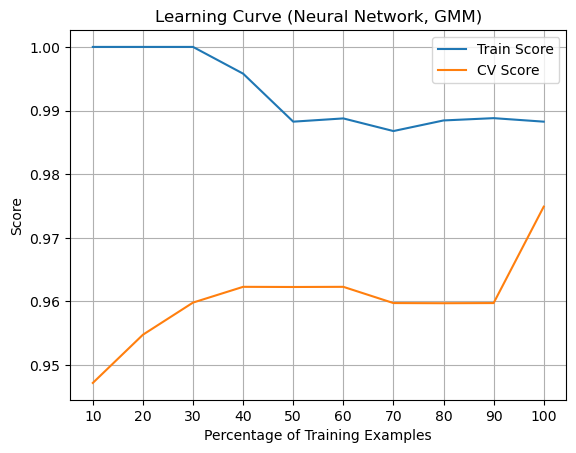

In [52]:
classifier_neural_network_learning = MLPClassifier(random_state=42, max_iter=2000, hidden_layer_sizes=classifier_neural_network_best.best_params_['hidden_layer_sizes'], alpha=classifier_neural_network_best.best_params_['alpha'])
_, train_scores, test_scores = learning_curve(classifier_neural_network_learning, X_GMM_train, y_GMM_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='CV Score')
plt.legend()
plt.title("Learning Curve (Neural Network, GMM)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.savefig('bcw_nn_learning_curve_gmm.png')
plt.show()